<font size="6"><strong>Analyzing Video Game sales</strong></font><br>
<font size="5"><strong>by Changlin Jiang</strong></font>

1. Introduction<br>
    1.1 Background Information<br>
    1.2 Library Used<br>
    1.3 Data Description<br>
2. Data collection<br>
    2.1 Importing Data<br>
    2.2 Cleaning Data<br>
3. Data Visualization & Analysis<br>
    3.1 Overall Statistics<br>
    3.2 Video Game Release by Year<br>
    3.3 Video Game Release by Publisher<br>
    3.4 Video Game Release by Platform<br>
    3.5 Video Game Release by Genre<br>
    3.6 Highest sales worldwide by year<br>
    3.7 Genre that sold the most in a single year<br>
    3.8 individual game have the highest sale globally<br>
    3.9 Top global sales by publisher<br>
    3.10 Sales comparison by genre<br>
    3.11 Top publisher by Count each year<br>
    3.12 Total revenue by region<br>
4. Conclusion<br>

<font size="6"><strong>1. Introduction</strong></font>

<font size="4">1.1 Background Information</font><br>
Since the 1980s, video games have gradually become an important part of the entertainment industry, and a lot people might not aware, they are also a form of art is a matter of dispute. I personally like playing games a lot and decided to analyze some of the trends about video game sales like te most popular platform or genre, the market that has the most sales, and so on. Accordingly, in this tutorial I will be doing only with exploratory analysis with an objective to understand how the data is distributed and generate insight for future data-driven decision-making. Moreover, this analysis is aiming to cover and discuss as much as possible the data in the simplest and the most informative way.

<font size="4">1.2 Library Used</font>
- pandas: Used to display and organize in dataframes
- datetime: Used to supply classes for manipulating dates and times.
- re: Used to clean the offense type by regular expression
- numpy: Used to make array for machine learning
- curve_fit: Used for non-linear regression curve fitting in machine learning
- Seaborn: Used to create plot
- Matplotlib: Used to format plots
- Scikit-learn: Used to create predictive model to group player into position groups

<font size="4">1.3 Data Description</font><br>
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

In [1]:
import pandas as pd
import datetime
import re
import numpy as np
from numpy import cos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from scipy.optimize import curve_fit
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

<font size="6"><strong>2. Data Collection</strong></font>
<br>
<font size="4">2.1 Importing Data</font><br>
The dataset we used is retrieved from https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv

In [2]:
vgdata = pd.read_csv("vgsales.csv",low_memory=False)
vgdata

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


From the info, we see that there are some null values for the year column and the publisher column, so we remove those rows with null values from the dataset.

Also, there is one row with year 2020, which is wrong for this dataset from 1980 to 2017, we will try to find a real year for it.

<font size="4">2.2 Cleaning Data</font>

In [4]:
year_data = vgdata['Year']
print("Max Year Value: ", year_data.max())
max_entry = year_data.idxmax()
max_entry = vgdata.iloc[max_entry]
pd.DataFrame(max_entry).T

Max Year Value:  2020.0


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


Makeup Artist game was launched in 16th April, 2009. Thus we will change 2020 to 2009

In [5]:
vgdata['Year'] = vgdata['Year'].replace(2020.0, 2009.0)

game_nullyear = vgdata[vgdata['Year'].isnull()]["Name"].unique()
print("total number of unique games in that missing year is : ",len(game_nullyear))
print("Total Publisher missing for ", vgdata['Publisher'].isnull().sum(),' rows')

total number of unique games in that missing year is :  233
Total Publisher missing for  58  rows


In [6]:
vgdata = vgdata.dropna()
vgdata.info()
vgdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

We have successfully imputed or removed null values.

<font size="6"><strong>3. Data Visualization & Analysis</strong></font>

<font size="4">3.1 Overall Statistics</font>

In [7]:
games = vgdata['Name'].unique()
publisher = vgdata['Publisher'].unique()
platforms = vgdata['Platform'].unique()
genres = vgdata['Genre'].unique()
print("total number of unique games: ",len(games))
print("total number of unique publisher: ",len(publisher))
print("total number of unique platforms: ",len(platforms))
print("total number of unique genres: ",len(genres))

total number of unique games:  11325
total number of unique publisher:  576
total number of unique platforms:  31
total number of unique genres:  12


<font size="4">3.2 Video Game Release by Year</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(

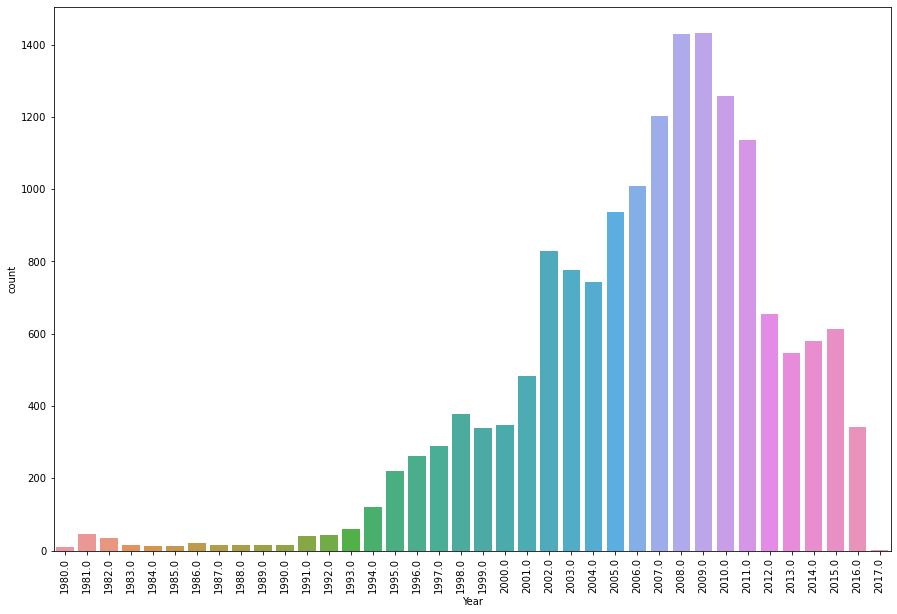

In [8]:
# plt.figure(figsize=(15, 10))
# sns.countplot(x="Year", data=vgdata, order = vgdata.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
# plt.xticks(rotation=90)

plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=vgdata, order = vgdata.groupby(by=['Year'])['Name'].count().index)
plt.xticks(rotation=90)

From the graph, we can observe that 2009 was the year that released the most games from 1980 to 2017.

It seems 2007 to 2010 were the years that released the most games.

We can also observe a trend that the number of games released are increasing since 1980 and reached a peak at 2009, and then started to decrease overtime.

<font size="4">3.3 Video Game Release by Publisher</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

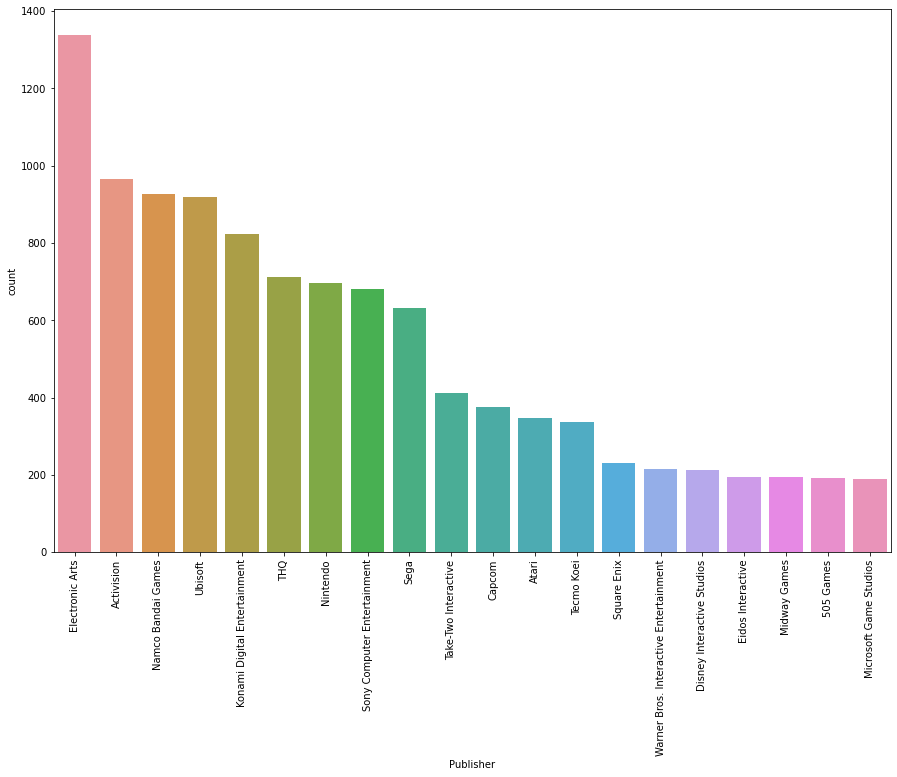

In [9]:
top_publisher = vgdata.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=vgdata, order = vgdata.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

From this graph, we can see that Electronic Arts is the publisher that released the most video games.

The top five publishers that release the most video games are: Electronic Arts, Activision, Namco Bandai Games, Ubisoft, and Konami Digital Entertainment.

<font size="4">3.4 Video Game Release by Platform</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600')])

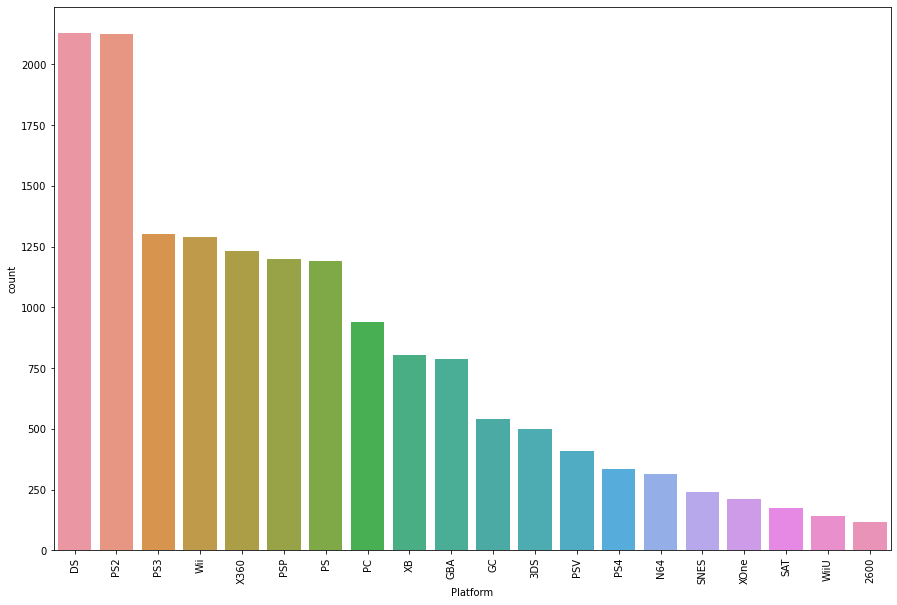

In [10]:
top_platforms = vgdata.groupby(by=['Platform'])['Year'].count().sort_values(ascending=False).head(20)
top_platforms = pd.DataFrame(top_platforms).reset_index()
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=vgdata, order = vgdata.groupby(by=['Platform'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

From this graph, we see that DS and PS2 have almost the same amount of video games released.

The most video games were released on the DS and PS2 platforms.

<font size="4">3.5 Video Game Release by Genre</font><br>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

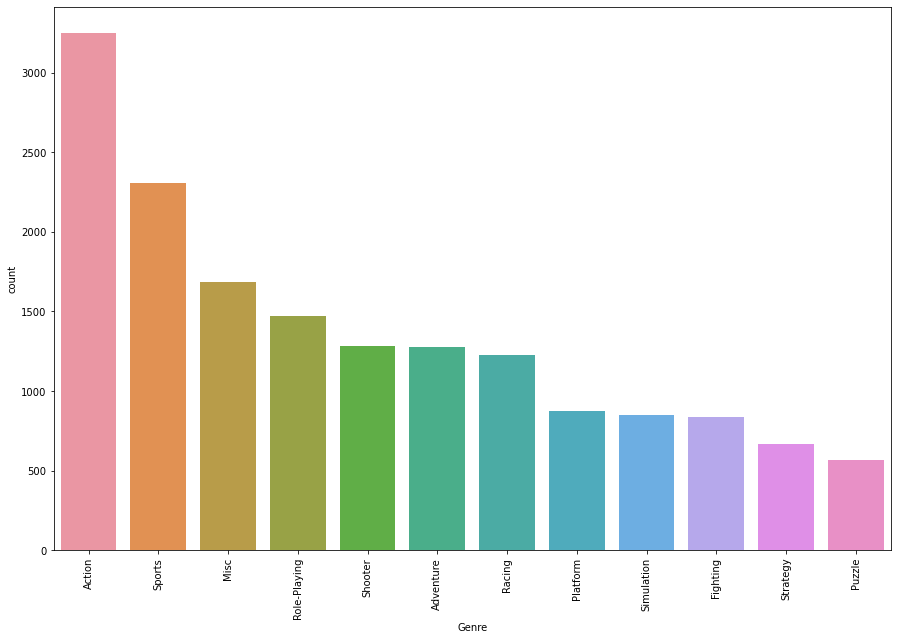

In [11]:
top_genre = vgdata.groupby(by=['Genre'])['Year'].count().sort_values(ascending=False).head(20)
top_genre = pd.DataFrame(top_genre).reset_index()
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=vgdata, order = vgdata.groupby(by=['Genre'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

From this graph, we can clearly see that action is the genre that has the most video games released and sports is the second most one.

<font size="4">3.6 Highest sales worldwide by year</font><br>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(

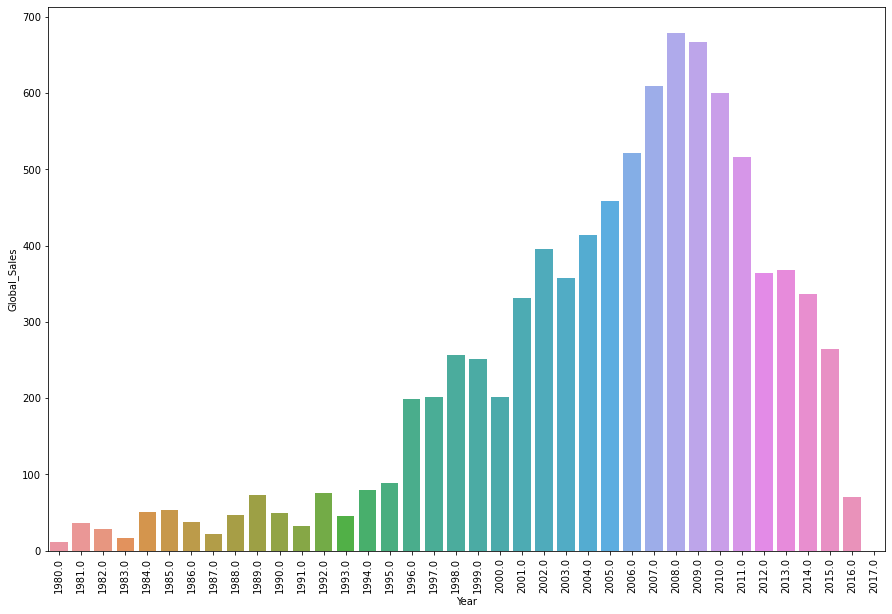

In [12]:
data_year = vgdata.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

From this graph, we can observe that 2008 was the year that had highest sales worldwide from 1980 to 2017.

It seems 2007 to 2010 were also the years that had the highest sales worldwide.

We can also observe a trend that the number of games released are increasing since 1980 and reached a peak at 2008, and then started to decrease overtime.

<font size="4">3.7 Genre that sold the most in a single year</font>

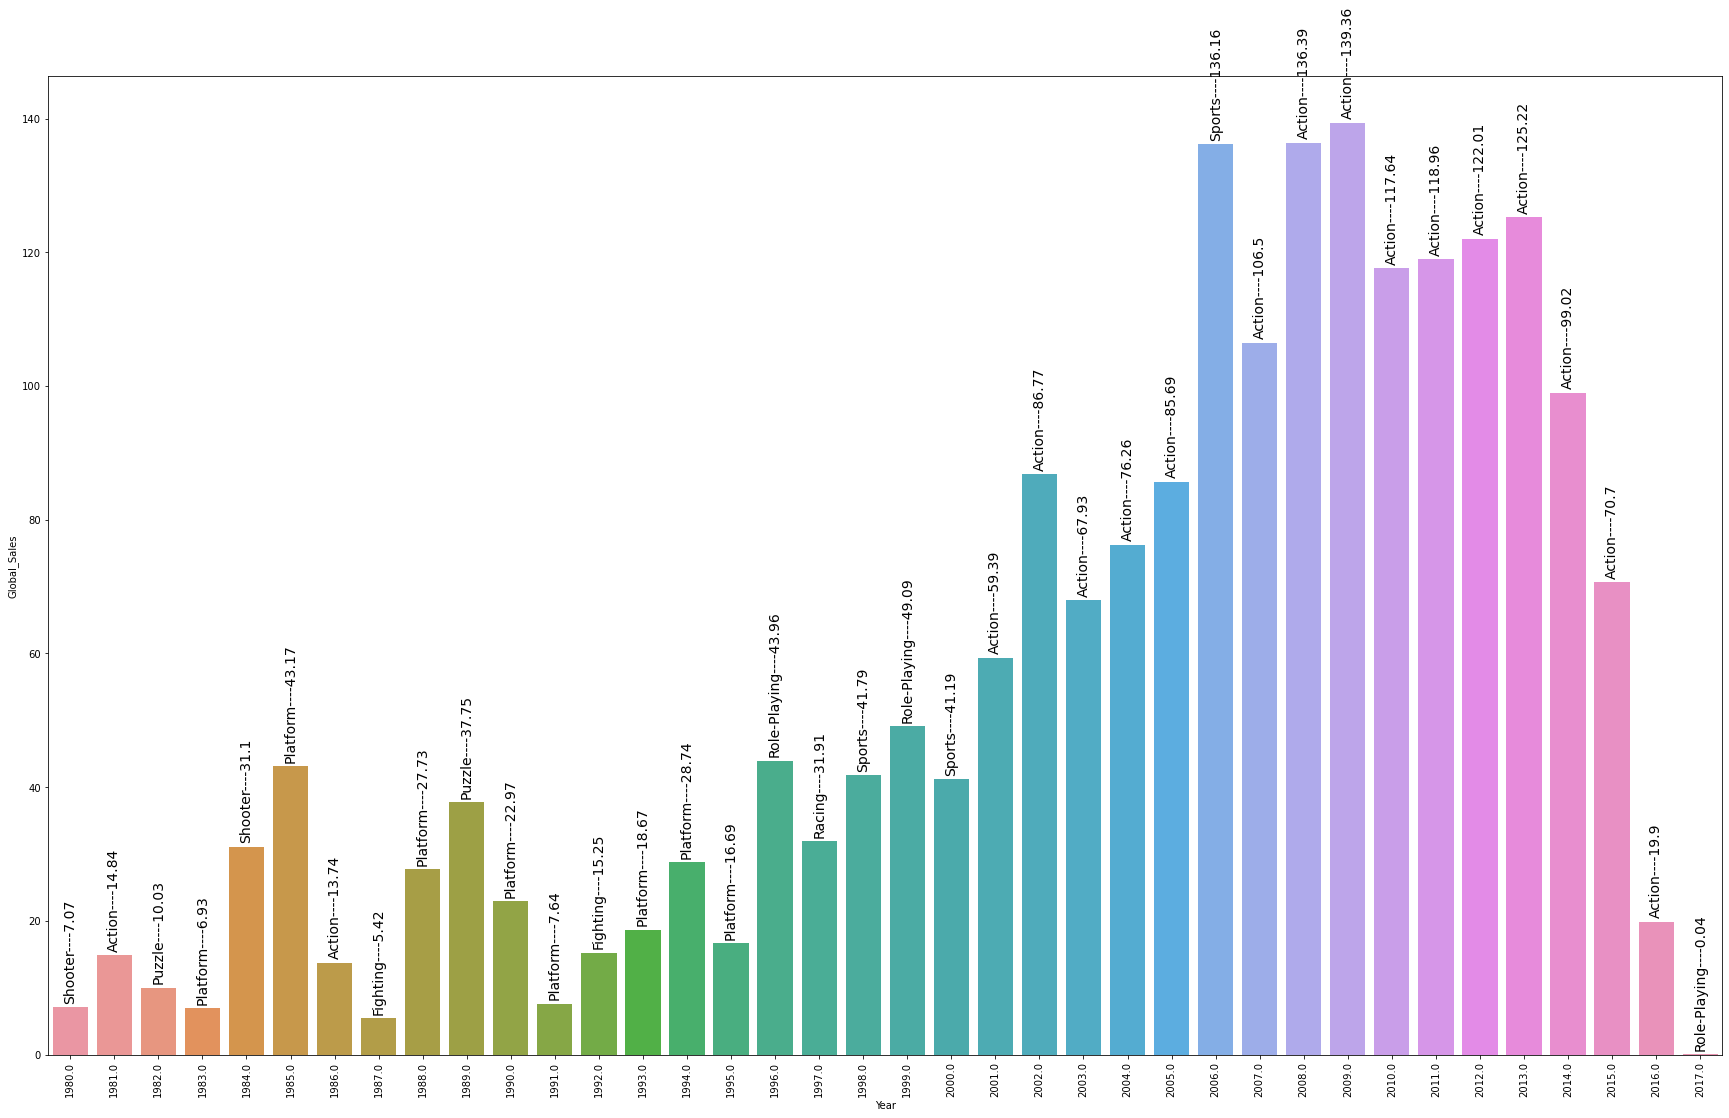

In [13]:
year_genre_0 = vgdata.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_genre = year_genre_0.groupby(by=['Year'])['Global_Sales'].transform(max) == year_genre_0['Global_Sales']
year_genre_max = year_genre_0[year_genre].reset_index(drop=True)

genre = year_genre_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_genre_max)
index = 0
for value in year_genre_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

From this graph, we noticed that starting from year 2001, the action genre video games were always sold the most except for year 2006 (the sports genre video games were sold the most. The number of the action genre video games sold was the highest in 2009, there were about 140 million video games were sold. It is surprising that the third most sold was the sports genre video game in 2006. My guess is that the game Wii Sports was released 2006 and Wii Sports sold over 41 million copies just in the U.S.

<font size="4">3.8 individual game have the highest sale globally</font>

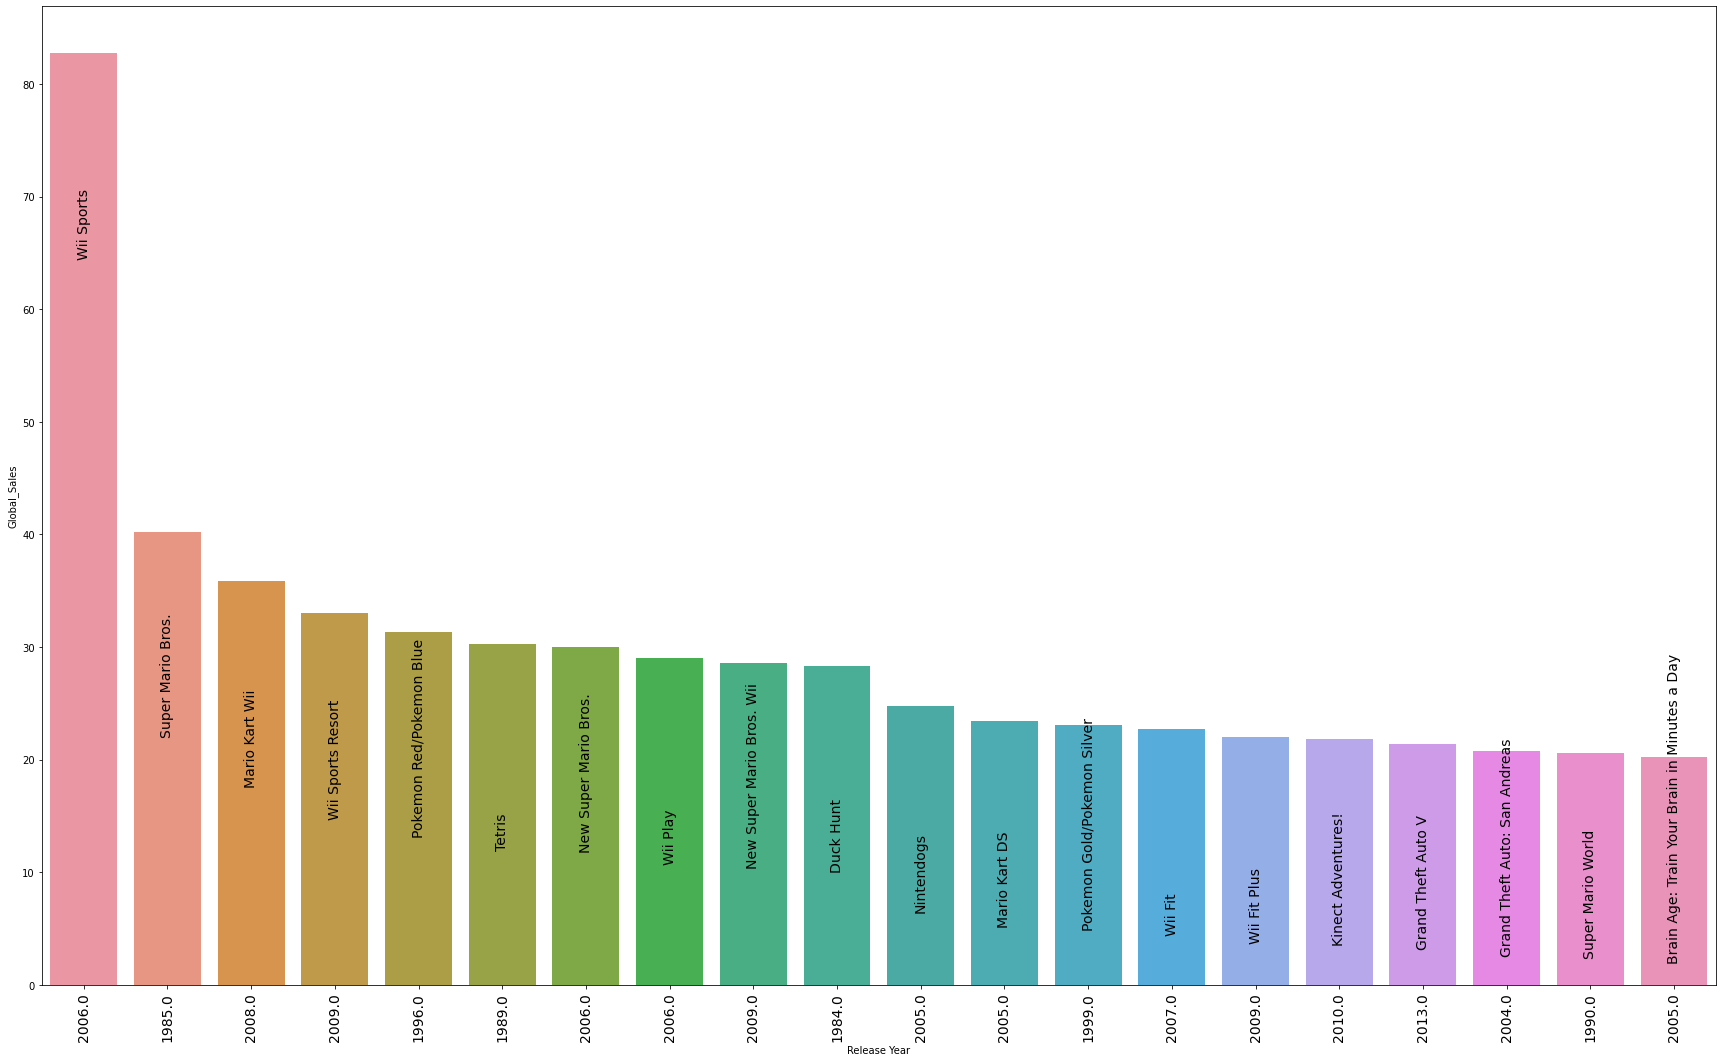

In [14]:
top_game_sale = vgdata.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

From this graph, we can clearly see that wii sports has the highest sale globally among all video games.

The top five highest sale video games are: Wii Sports, Super Mario Bros, Mario Kart Wii, Wii Sports Resort, and Pokemon Red/Pokemon Blue.

We notice that Will Sports and Wii Sports Resort both are on the top five sale. It seems Wii Sports series video games are loved by many gamers.

<font size="4">3.9 Top global sales by publisher</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

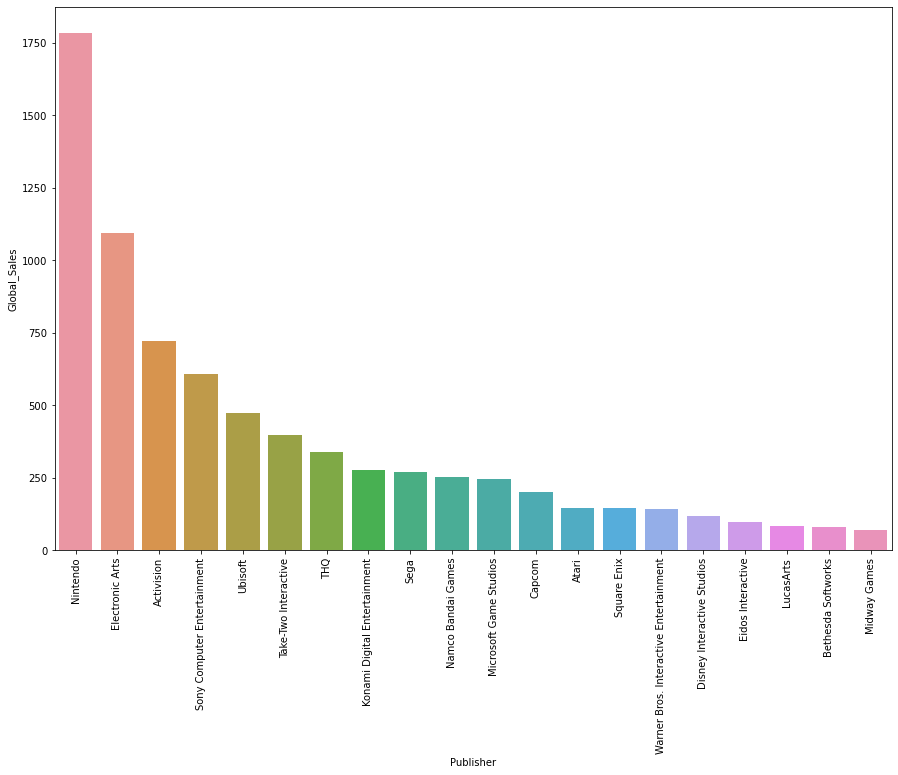

In [15]:
sale_pbl = vgdata[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

From this graph, we se that Nintendo is the highest global sale publisher. Recall that the top five publishers that release the most video games are: Electronic Arts, Activision, Namco Bandai Games, Ubisoft, and Konami Digital Entertainment, which doesn't include Nintendo. It is interesting that Nintendo earns more than others but it is not one of the top five publisher.

<font size="4">3.10 Sales comparison by genre</font>

In [16]:
comp_genre = vgdata[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()

comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99


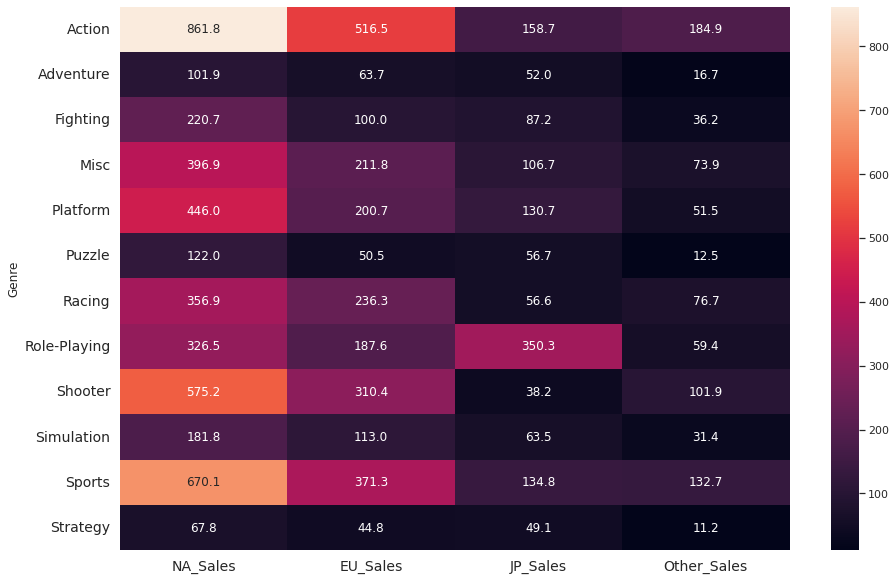

In [17]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

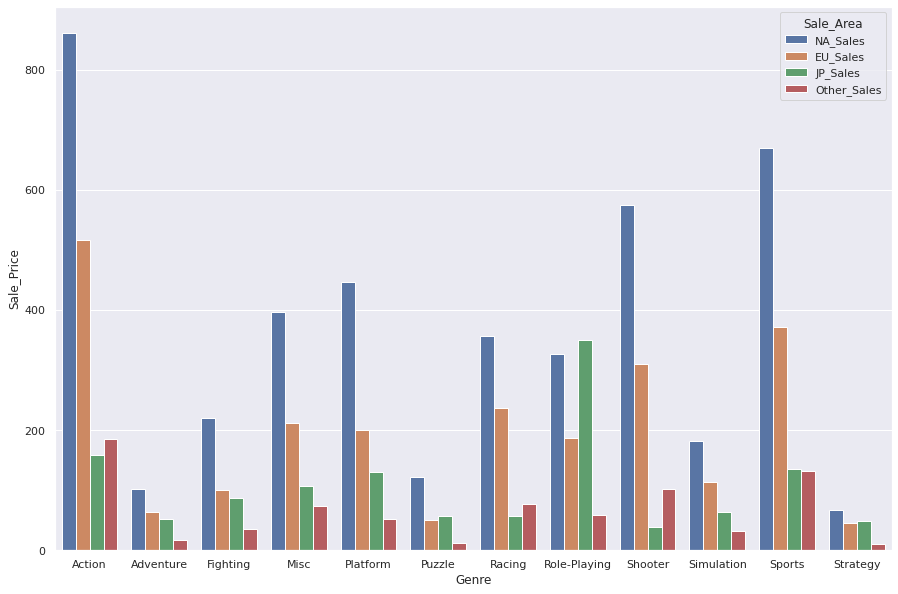

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

From this graph and the heatmap above, we noticed that Role-Playing video game seems to be the only game genre that JP has more sales than NA. Moreover, action genre video games have the most sales in NA, EU, and Other sales, but Role-Playing video games have the most sales in JP. I think it is because of Japanese anime culture. Anime culture is very popular in Japan, and anime role-playing is a big part of Role-Playing for video games.

<font size="4">3.11 Top publisher by Count each year</font>

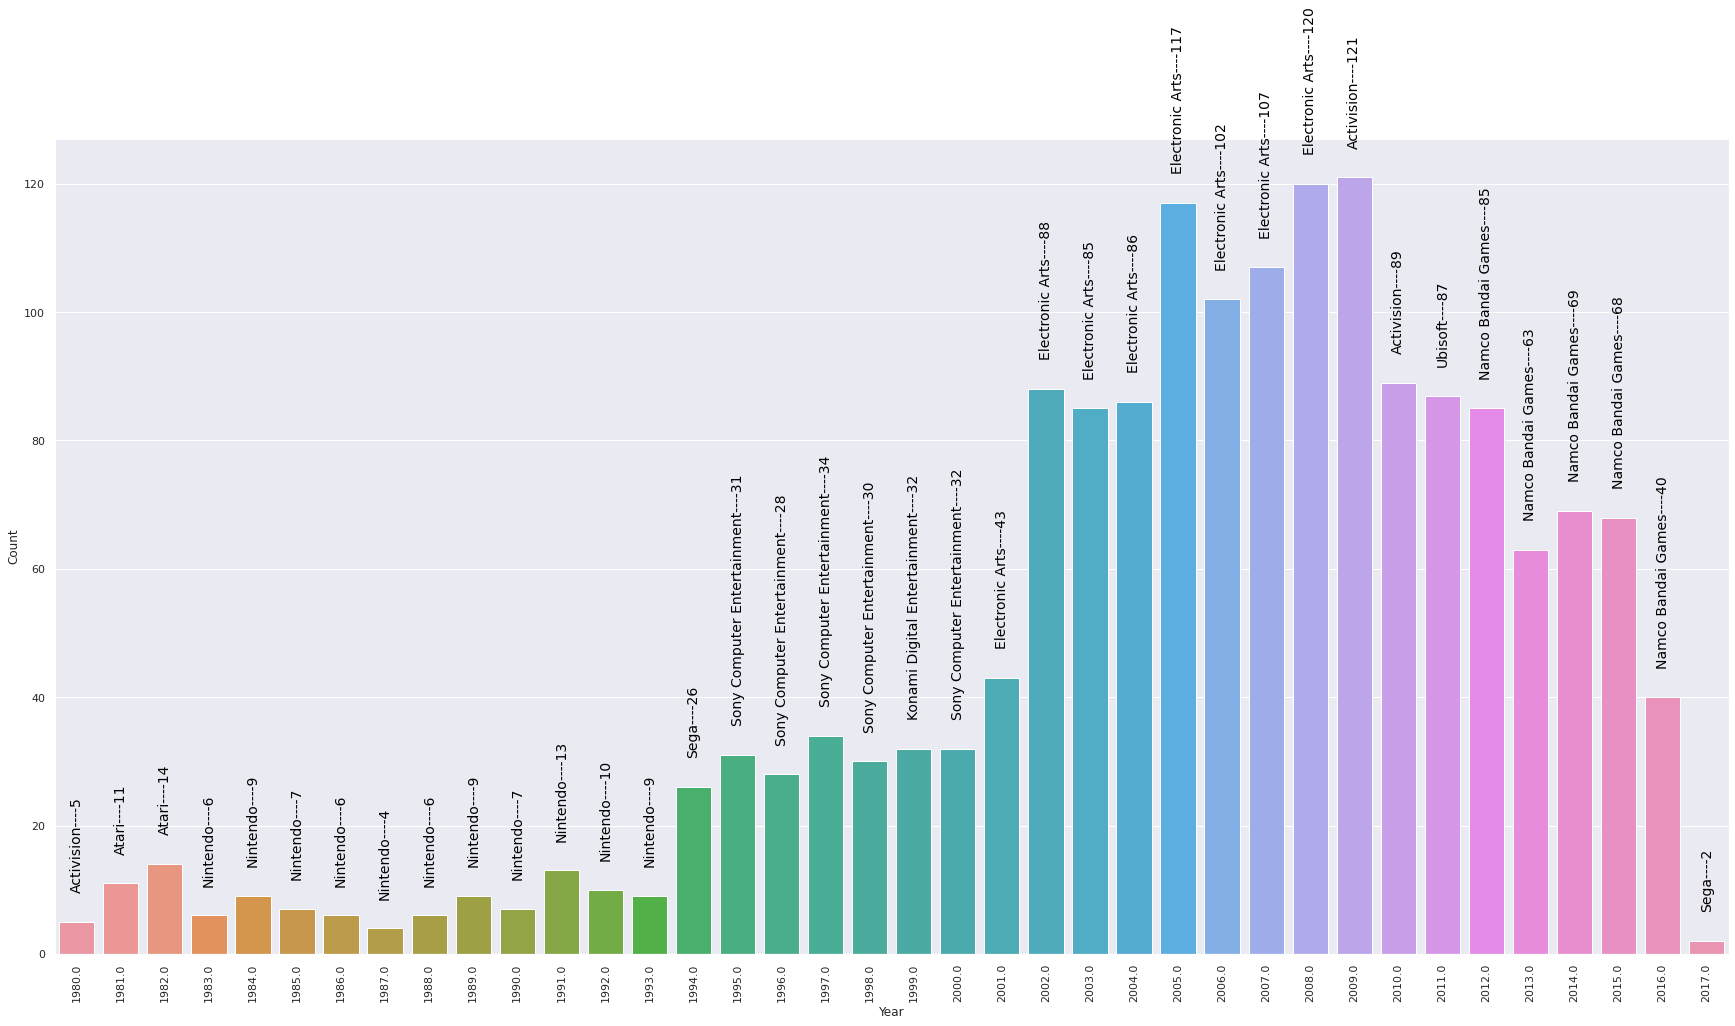

In [19]:
top_publisher =  vgdata[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

publisher= top_publisher_count['Publisher']

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0

for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

In this graph, we can clearly see that Nintendo published the most video games each year from 1983 to 1993. Sony computer entertainment published the most video games from 1995 to 2001 except for 2000. Electronic Arts published the most video games from 2001 to 2008. It is very interesting that publishers would "dominate" the video game industry for a few years.

<font size="4">3.12 Total revenue by region</font>

In [20]:
top_sale_reg = vgdata[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})

top_sale_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


<AxesSubplot:xlabel='region', ylabel='sale'>

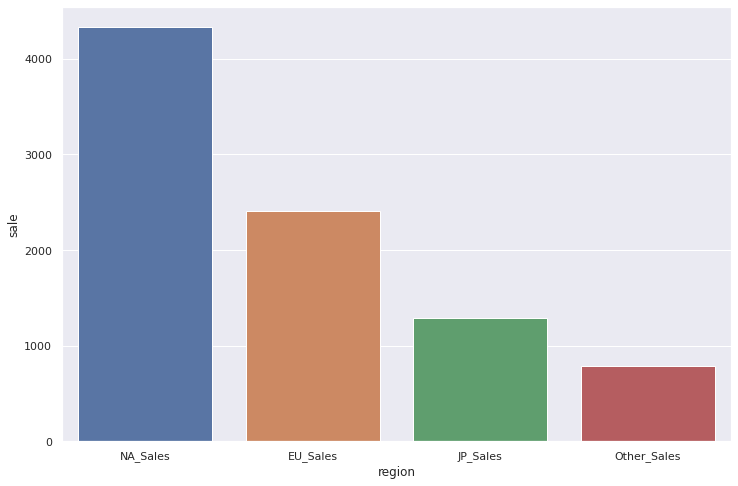

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

From this graph, we see that North America has the highest total revenue among NA_Sales, EU_Sales, JP_Sales, and Other_Sales. 

([<matplotlib.patches.Wedge at 0x7f6f6dccf250>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

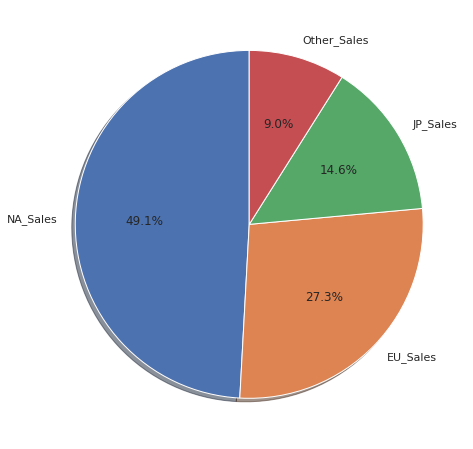

In [22]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

From this pie chart, it is more clear that NA_Sales contributes almost half of the worldwide total revenue, which is about 49.1%.

<font size="6"><strong>4. Conclusion</strong></font>

From all the data analysis above, we can generate some thoughts/insights based on the observation throughout the graphs and analysis.

- Video Games are publishing more and more each year, the sales of video games are also increasing. Video games are more and more popular as the time goes on, it is one of the popular entertainment.
- Action genre video game has become the most sales genre of video games, most gamers love to play action genre video games recent year.
- North American Sales contributes the most part of the worldwide sales, which is almost 50% percent of the total sales worldwide. Publishers would tend to first publish the video games on North America since it is the biggest part of the market.